In [1]:
import json
import pandas as pd
from pathlib import Path
from pprint import pprint
import datetime
import time
import numpy as np
import matplotlib as plt

import pandas
import researchpy as rp
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp

%matplotlib inline

In [2]:
#path_results = Path('/media/discoD/models/elmo/ner/results_20_epochs_ibm')
#path_results = Path('/media/discoD/models/elmo/ner/results_1_epoch_harem_all_combinations')
#path_results = Path('/opt/models/elmo/ner/results (pre queda energia, datalawyer)')
path_results = Path('/media/discoD/models/elmo/jur/results_ibm')

In [3]:
for folder in path_results.iterdir():
    print(folder)

/media/discoD/models/elmo/jur/results_ibm/datalawyer-ft_ELMo
/media/discoD/models/elmo/jur/results_ibm/datalawyer-ft_ELMo+CNN
/media/discoD/models/elmo/jur/results_ibm/datalawyer-ft_ELMo+CNN+Embeddings
/media/discoD/models/elmo/jur/results_ibm/datalawyer-ft_ELMo+Embeddings
/media/discoD/models/elmo/jur/results_ibm/datalawyer_ELMo
/media/discoD/models/elmo/jur/results_ibm/datalawyer_ELMo+CNN
/media/discoD/models/elmo/jur/results_ibm/datalawyer_ELMo+CNN+Embeddings
/media/discoD/models/elmo/jur/results_ibm/datalawyer_ELMo+Embeddings
/media/discoD/models/elmo/jur/results_ibm/datalawyer_ELMo-pt
/media/discoD/models/elmo/jur/results_ibm/datalawyer_ELMo-pt+CNN
/media/discoD/models/elmo/jur/results_ibm/datalawyer_ELMo-pt+CNN+Embeddings
/media/discoD/models/elmo/jur/results_ibm/datalawyer_ELMo-pt+Embeddings


In [4]:
configs = dict()
metrics = dict()
for folder in path_results.iterdir():
    results_model_folder = folder.iterdir()
    for training_folder in results_model_folder:
        #print('Reading files from %s' % training_folder.name)
        has_metrics = False
        for results_file in training_folder.iterdir():
            if results_file.name.endswith('.json'):
                #print('Parsing data from %s' % results_file.name)
                if results_file.name.startswith('config'):
                    configs[training_folder.name] = json.loads(results_file.read_bytes())
                elif results_file.name.startswith('metrics.'):
                    metrics[training_folder.name] = json.loads(results_file.read_bytes())
                    has_metrics = True
        if not has_metrics:
            print('"%s"' % training_folder.name)
            del configs[training_folder.name]
print(len(metrics))
print(len(configs))

1080
1080


In [5]:
def get_seconds(time_str):
    x = time.strptime(time_str.split('.')[0],'%H:%M:%S')
    return datetime.timedelta(hours=x.tm_hour,minutes=x.tm_min,seconds=x.tm_sec).total_seconds()
def get_average_epoch_duration(metrics):
    seconds = get_seconds(metrics['training_duration'])
    training_epochs = metrics['training_epochs'] + 1
    return seconds / training_epochs

In [6]:
TRAINING_ID = 'Training_ID'
SCENARIO = 'Scenario'
MODEL = 'Model'
REPRESENTATION = 'Representation'
EMBEDDING = 'Embedding'
EMBEDDING_TYPE = 'Embedding_Type'
DOMAIN_SPECIFIC = 'Domain_Specific'
BATCH_SIZE = 'Batch_Size'
ELMO_DROPOUT = 'ELMo_Dropout'
TRAINING_NUMBER = 'Training_Number'
EXECUTION_NUMBER = 'Execution_Number'
BEST_EPOCH = 'Best_Epoch'
TRAINING_EPOCHS = 'Training_Epochs'
TRAINING_DURATION = 'Training_Duration'
TOTAL_DURATION = 'Total_Duration(s)'
AVERAGE_EPOCH_DURATION = 'Average_Epoch_Duration(s)'
TRAINING_ACCURACY = 'Training_Accuracy'
TRAINING_ACCURACY_TOP3 = 'Training_Accuracy_Top-3'
TRAINING_PRECISION = 'Training_Precision'
TRAINING_RECALL = 'Training_Recall'
TRAINING_F1_MEASURE = 'Training_F1-Measure'
TRAINING_LOSS = 'Training_Loss'
BEST_VALIDATION_ACCURACY = 'Best_Validation_Accuracy'
BEST_VALIDATION_ACCURACY_TOP3 = 'Best_Validation_Accuracy_Top-3'
BEST_VALIDATION_PRECISION = 'Best_Validation_Precision'
BEST_VALIDATION_RECALL = 'Best_Validation_Recall'
BEST_VALIDATION_F1_MEASURE = 'Best_Validation_F1-Measure'
BEST_VALIDATION_LOSS = 'Best_Validation_Loss'
TEST_ACCURACY = 'Test_Accuracy'
TEST_ACCURACY_TOP3 = 'Test_Accuracy_Top-3'
TEST_PRECISION = 'Test_Precision'
TEST_RECALL = 'Test_Recall'
TEST_F1_MEASURE = 'Test_F1_Measure'
TEST_LOSS = 'Test_Loss'
columns = [TRAINING_ID, MODEL, REPRESENTATION, EMBEDDING, EMBEDDING_TYPE, DOMAIN_SPECIFIC, EXECUTION_NUMBER, BEST_EPOCH, TRAINING_EPOCHS, TRAINING_DURATION, TOTAL_DURATION, AVERAGE_EPOCH_DURATION, TRAINING_ACCURACY, TRAINING_ACCURACY_TOP3, TRAINING_PRECISION, TRAINING_RECALL, TRAINING_F1_MEASURE, TRAINING_LOSS, BEST_VALIDATION_ACCURACY, BEST_VALIDATION_ACCURACY_TOP3, BEST_VALIDATION_PRECISION, BEST_VALIDATION_RECALL, BEST_VALIDATION_F1_MEASURE, BEST_VALIDATION_LOSS, TEST_ACCURACY, TEST_ACCURACY_TOP3, TEST_PRECISION, TEST_RECALL, TEST_F1_MEASURE, TEST_LOSS]
columns

['Training_ID',
 'Model',
 'Representation',
 'Embedding',
 'Embedding_Type',
 'Domain_Specific',
 'Execution_Number',
 'Best_Epoch',
 'Training_Epochs',
 'Training_Duration',
 'Total_Duration(s)',
 'Average_Epoch_Duration(s)',
 'Training_Accuracy',
 'Training_Accuracy_Top-3',
 'Training_Precision',
 'Training_Recall',
 'Training_F1-Measure',
 'Training_Loss',
 'Best_Validation_Accuracy',
 'Best_Validation_Accuracy_Top-3',
 'Best_Validation_Precision',
 'Best_Validation_Recall',
 'Best_Validation_F1-Measure',
 'Best_Validation_Loss',
 'Test_Accuracy',
 'Test_Accuracy_Top-3',
 'Test_Precision',
 'Test_Recall',
 'Test_F1_Measure',
 'Test_Loss']

In [7]:
def get_training_data_from_id(training_id, config):
    data = training_id.split('_')
    print(data)
    if len(data) == 3:
        return {MODEL: data[0], REPRESENTATION: data[1], EMBEDDING: 'No', EMBEDDING_TYPE: 'No', DOMAIN_SPECIFIC: False, EXECUTION_NUMBER: data[2]}
    elif len(data) == 4:
        #GloVe
        return {MODEL: data[0], REPRESENTATION: data[1], EMBEDDING: data[2], EMBEDDING_TYPE: 'No', DOMAIN_SPECIFIC: False, EXECUTION_NUMBER: data[3]}
    elif len(data) == 5:
        return {MODEL: data[0], REPRESENTATION: data[1], EMBEDDING: data[2], EMBEDDING_TYPE: data[3], DOMAIN_SPECIFIC: False, EXECUTION_NUMBER: data[4]}
    elif len(data) == 6:
        return {MODEL: data[0], REPRESENTATION: data[1], EMBEDDING: data[2], EMBEDDING_TYPE: 'No', DOMAIN_SPECIFIC: True, EXECUTION_NUMBER: data[5]}
    elif len(data) == 7:
        return {MODEL: data[0], REPRESENTATION: data[1], EMBEDDING: data[2], EMBEDDING_TYPE: data[4], DOMAIN_SPECIFIC: True, EXECUTION_NUMBER: data[6]}
    else:
        print('Check id: %s' % training_id)

In [69]:
training_data = []
for training_id, config in configs.items():
    training_metrics = metrics[training_id]
    data = get_training_data_from_id(training_id, config)
    if '-pt' in data[REPRESENTATION]:
        data[MODEL] = 'datalawyer-pt'
        data[REPRESENTATION] = data[REPRESENTATION].replace('-pt', '')
    if '-lc' in data[EMBEDDING]:
        data[EMBEDDING] = data[EMBEDDING].replace('-lc', '')
        data[DOMAIN_SPECIFIC] = True
    data[DOMAIN_SPECIFIC] = 'Sim' if data[DOMAIN_SPECIFIC] else 'Não'
    data[TRAINING_ID] = training_id
    data[BEST_EPOCH] = training_metrics['best_epoch'] if training_metrics else None
    data[TRAINING_EPOCHS] = training_metrics['training_epochs'] + 1 if training_metrics else None
    data[TRAINING_DURATION] = training_metrics['training_duration'] if training_metrics else None
    data[TOTAL_DURATION] = get_seconds(training_metrics['training_duration']) if training_metrics else None
    data[AVERAGE_EPOCH_DURATION] = get_average_epoch_duration(training_metrics) if training_metrics else None
    data[TRAINING_ACCURACY] = training_metrics['training_accuracy'] if training_metrics else None
    data[TRAINING_ACCURACY_TOP3] = training_metrics['training_accuracy3'] if training_metrics else None
    data[TRAINING_PRECISION] = training_metrics['training_precision-overall'] if training_metrics else None
    data[TRAINING_RECALL] = training_metrics['training_recall-overall'] if training_metrics else None
    data[TRAINING_F1_MEASURE] = training_metrics['training_f1-measure-overall'] if training_metrics else None
    data[TRAINING_LOSS] = training_metrics['training_loss'] if training_metrics else None
    data[BEST_VALIDATION_ACCURACY] = training_metrics['best_validation_accuracy'] if training_metrics else None
    data[BEST_VALIDATION_ACCURACY_TOP3] = training_metrics['best_validation_accuracy3'] if training_metrics else None
    data[BEST_VALIDATION_PRECISION] = training_metrics['best_validation_precision-overall'] if training_metrics else None
    data[BEST_VALIDATION_RECALL] = training_metrics['best_validation_recall-overall'] if training_metrics else None
    data[BEST_VALIDATION_F1_MEASURE] = training_metrics['best_validation_f1-measure-overall'] if training_metrics else None
    data[BEST_VALIDATION_LOSS] = training_metrics['best_validation_loss'] if training_metrics else None
    data[TEST_ACCURACY] = training_metrics['test_accuracy'] if training_metrics else None
    data[TEST_ACCURACY_TOP3] = training_metrics['test_accuracy3'] if training_metrics else None
    data[TEST_PRECISION] = training_metrics['test_precision-overall'] if training_metrics else None
    data[TEST_RECALL] = training_metrics['test_recall-overall'] if training_metrics else None
    data[TEST_F1_MEASURE] = training_metrics['test_f1-measure-overall'] if training_metrics else None
    data[TEST_LOSS] = training_metrics['test_loss'] if training_metrics else None
    training_data.append(data)

['datalawyer-ft', 'ELMo', '0']
['datalawyer-ft', 'ELMo', '1']
['datalawyer-ft', 'ELMo', '10']
['datalawyer-ft', 'ELMo', '11']
['datalawyer-ft', 'ELMo', '2']
['datalawyer-ft', 'ELMo', '3']
['datalawyer-ft', 'ELMo', '4']
['datalawyer-ft', 'ELMo', '5']
['datalawyer-ft', 'ELMo', '6']
['datalawyer-ft', 'ELMo', '7']
['datalawyer-ft', 'ELMo', '8']
['datalawyer-ft', 'ELMo', '9']
['datalawyer-ft', 'ELMo+CNN', '0']
['datalawyer-ft', 'ELMo+CNN', '1']
['datalawyer-ft', 'ELMo+CNN', '10']
['datalawyer-ft', 'ELMo+CNN', '11']
['datalawyer-ft', 'ELMo+CNN', '2']
['datalawyer-ft', 'ELMo+CNN', '3']
['datalawyer-ft', 'ELMo+CNN', '4']
['datalawyer-ft', 'ELMo+CNN', '5']
['datalawyer-ft', 'ELMo+CNN', '6']
['datalawyer-ft', 'ELMo+CNN', '7']
['datalawyer-ft', 'ELMo+CNN', '8']
['datalawyer-ft', 'ELMo+CNN', '9']
['datalawyer-ft', 'ELMo+CNN+Embeddings', 'fasttext-lc', 'jur', 'cbow', '5B-jur2vec-nilc', '0']
['datalawyer-ft', 'ELMo+CNN+Embeddings', 'fasttext-lc', 'jur', 'cbow', '5B-jur2vec-nilc', '1']
['datalawyer-f

In [70]:
pd.set_option('display.max_columns', 1000)
training_data_df = pd.DataFrame(training_data, columns=columns)
#training_data_df = training_data_df[(training_data_df[EXECUTION_NUMBER]).astype(int) < 1]
training_data_df

,Training_ID,Model,Representation,Embedding,Embedding_Type,Domain_Specific,Execution_Number,Best_Epoch,Training_Epochs,Training_Duration,Total_Duration(s),Average_Epoch_Duration(s),Training_Accuracy,Training_Accuracy_Top-3,Training_Precision,Training_Recall,Training_F1-Measure,Training_Loss,Best_Validation_Accuracy,Best_Validation_Accuracy_Top-3,Best_Validation_Precision,Best_Validation_Recall,Best_Validation_F1-Measure,Best_Validation_Loss,Test_Accuracy,Test_Accuracy_Top-3,Test_Precision,Test_Recall,Test_F1_Measure,Test_Loss
0,datalawyer-ft_ELMo_0,datalawyer-ft,ELMo,No,No,Não,0,4,5,00:26:12,1572.0,314.4,0.990201,0.990597,0.897234,0.892617,0.894920,39.935539,0.987270,0.987657,0.872615,0.889590,0.881021,46.633434,0.986592,0.987099,0.867756,0.911076,0.888889,50.797832
1,datalawyer-ft_ELMo_1,datalawyer-ft,ELMo,No,No,Não,1,4,5,00:26:27,1587.0,317.4,0.990072,0.990441,0.896653,0.889933,0.893280,39.944456,0.987324,0.987817,0.882568,0.889064,0.885804,46.596758,0.986032,0.986722,0.873679,0.902756,0.887980,50.931561
2,datalawyer-ft_ELMo_10,datalawyer-ft,ELMo,No,No,Não,10,4,5,00:26:35,1595.0,319.0,0.989971,0.990385,0.896548,0.891834,0.894185,40.799809,0.987070,0.987523,0.884073,0.890116,0.887084,45.507208,0.985954,0.986592,0.867000,0.901716,0.884017,49.279090
3,datalawyer-ft_ELMo_11,datalawyer-ft,ELMo,No,No,Não,11,4,5,00:26:34,1594.0,318.8,0.989971,0.990385,0.896548,0.891834,0.894185,40.799809,0.987070,0.987523,0.884073,0.890116,0.887084,45.507208,0.985954,0.986592,0.867000,0.901716,0.884017,49.279090
4,datalawyer-ft_ELMo_2,datalawyer-ft,ELMo,No,No,Não,2,4,5,00:26:37,1597.0,319.4,0.989994,0.990391,0.894743,0.889038,0.891881,39.689800,0.987244,0.987737,0.874546,0.886961,0.880710,45.476525,0.986565,0.987164,0.871257,0.907956,0.889228,49.654239
5,datalawyer-ft_ELMo_3,datalawyer-ft,ELMo,No,No,Não,3,4,5,00:26:14,1574.0,314.8,0.989966,0.990365,0.896164,0.891051,0.893600,40.184671,0.987137,0.987563,0.878772,0.888013,0.883368,46.486709,0.986006,0.986513,0.869238,0.902236,0.885430,50.938980
6,datalawyer-ft_ELMo_4,datalawyer-ft,ELMo,No,No,Não,4,4,5,00:26:28,1588.0,317.6,0.989957,0.990374,0.895021,0.890716,0.892863,39.775947,0.987550,0.987990,0.878835,0.888538,0.883660,46.096697,0.986448,0.986956,0.870195,0.906396,0.887927,50.491434
7,datalawyer-ft_ELMo_5,datalawyer-ft,ELMo,No,No,Não,5,4,5,00:26:24,1584.0,316.8,0.990036,0.990419,0.894885,0.890380,0.892627,39.982715,0.987204,0.987670,0.878378,0.888538,0.883429,47.215280,0.985394,0.986058,0.864204,0.900156,0.881814,52.648934
8,datalawyer-ft_ELMo_6,datalawyer-ft,ELMo,No,No,Não,6,4,5,00:26:25,1585.0,317.0,0.989971,0.990385,0.896548,0.891834,0.894185,40.799809,0.987070,0.987523,0.884073,0.890116,0.887084,45.507208,0.985954,0.986592,0.867000,0.901716,0.884017,49.279090
9,datalawyer-ft_ELMo_7,datalawyer-ft,ELMo,No,No,Não,7,4,5,00:26:18,1578.0,315.6,0.989971,0.990385,0.896548,0.891834,0.894185,40.799809,0.987070,0.987523,0.884073,0.890116,0.887084,45.507208,0.985954,0.986592,0.867000,0.901716,0.884017,49.279090


In [71]:
training_data_df.to_csv('training_data_5_epochs_mestrado_datalawyer.csv', index=None)

In [72]:
str(datetime.timedelta(seconds=training_data_df[TOTAL_DURATION].mean()))

'0:29:19.025000'

In [73]:
default_exported_columns = ['mean', 'min', 'max', 'std']
renamed_columns = ['Contagem', 'F-Score', 'Desvio Padrão', 'Mínimo', '25%', '50%', '75%', 'Máximo']
exported_columns_names = ['F-Score', 'Mínimo', 'Máximo', 'Desvio Padrão']
model_map = {'datalawyer-ft': 'Sim', 'datalawyer': 'Não', 'datalawyer-pt': 'Geral'}
representation_map = {'ELMo+CNN+Embeddings': 'ELMo+CNN+Vetor', 'ELMo+Embeddings': 'ELMo+Vetor', 'ELMo-pt+CNN+Embeddings': 'ELMo+CNN+Vetor', 'ELMo-pt+Embeddings': 'ELMo+Vetor', 'ELMo-pt': 'ELMo', 'ELMo-pt+CNN': 'ELMo+CNN'}
embedding_type_map = {'skip': 'Skip-Gram', 'No': 'Sem Vetor', 'cbow': 'CBoW'}
embedding_map = {'wang2vec': 'Wang2Vec', 'glove': 'GloVe', 'word2vec': 'Word2Vec', 'No': 'Sem Vetor', 'fasttext': 'FastText', 'wang2vec-lc': 'Wang2Vec', 'glove-lc': 'GloVe', 'word2vec-lc': 'Word2Vec', 'fasttext-lc': 'FastText'}
replacements_map = {**model_map, **representation_map, **embedding_type_map, **embedding_map}

def get_group_csv(index_names, group_name, group_columns, target_value, index_map, dataframe=training_data_df, exported_columns=default_exported_columns):
    dataframe = dataframe.rename(index={'ELMo-pt+CNN+Embeddings': 'ELMo+CNN+Vetor', 'ELMo-pt+Embeddings': 'ELMo+Vetor', 'ELMo-pt': 'ELMo', 'ELMo-pt+CNN': 'ELMo+CNN'})
    if type(index_names) == str:
        index_names = [index_names]
    group = dataframe.groupby(group_columns).describe()[target_value].sort_values(by='mean', ascending=False)
    for column in exported_columns:
        group[column] = group[column] * 100
    group.index.names = index_names
    group = group.rename(index=index_map)
    group.columns = renamed_columns
    group.to_csv('grupo_' + group_name + '_5_epochs_mestrado_datalawyer.csv', columns=exported_columns_names, float_format = '%.2f%%')
    return group

In [74]:
get_group_csv('Ajuste Fino', MODEL, MODEL, TEST_F1_MEASURE, model_map)

,Contagem,F-Score,Desvio Padrão,Mínimo,25%,50%,75%,Máximo
Ajuste Fino,,,,,,,,
Sim,360.0,88.275206,0.373287,87.127713,0.880586,0.882935,0.885093,89.149261
Não,360.0,88.254976,0.372831,86.932392,0.880363,0.883031,0.885380,89.116517
Geral,360.0,86.266621,0.825149,83.379995,0.860373,0.863371,0.867688,87.576065


In [75]:
get_group_csv('Representação', REPRESENTATION, REPRESENTATION, TEST_F1_MEASURE, representation_map)

,Contagem,F-Score,Desvio Padrão,Mínimo,25%,50%,75%,Máximo
Representação,,,,,,,,
ELMo+Vetor,504.0,87.719106,0.885585,85.254281,0.872514,0.880569,0.883930,89.058914
ELMo+CNN+Vetor,504.0,87.560786,1.101661,84.311257,0.866061,0.880396,0.883848,89.149261
ELMo,36.0,87.187646,1.892465,84.538717,0.845387,0.884017,0.884507,88.922842
ELMo+CNN,36.0,86.861887,1.992876,83.379995,0.845187,0.881068,0.883863,88.746803


In [76]:
get_group_csv('Tipo de Vetor', EMBEDDING_TYPE, EMBEDDING_TYPE, TEST_F1_MEASURE, embedding_type_map)

,Contagem,F-Score,Desvio Padrão,Mínimo,25%,50%,75%,Máximo
Tipo de Vetor,,,,,,,,
Skip-Gram,432.0,87.760384,0.838315,85.454086,0.872579,0.881089,0.883780,88.996434
Sem Vetor,216.0,87.590388,1.442904,83.379995,0.864487,0.882718,0.885869,89.149261
CBoW,432.0,87.441757,1.109437,84.311257,0.866068,0.878197,0.883254,89.074778


In [77]:
get_group_csv('Vetor', EMBEDDING, EMBEDDING, TEST_F1_MEASURE, embedding_map)

,Contagem,F-Score,Desvio Padrão,Mínimo,25%,50%,75%,Máximo
Vetor,,,,,,,,
GloVe,144.0,87.873198,1.013225,85.505420,0.871351,0.882810,0.886434,89.149261
Wang2Vec,288.0,87.741706,0.841862,85.560676,0.868744,0.881313,0.883974,88.956743
Word2Vec,288.0,87.726069,0.947944,85.184257,0.871842,0.881300,0.884742,89.074778
FastText,288.0,87.335437,1.125411,84.311257,0.863136,0.878185,0.881406,88.877525
Sem Vetor,72.0,87.024766,1.936544,83.379995,0.845387,0.882301,0.884507,88.922842


In [78]:
get_group_csv(['Vetor', 'Domínio Específico'], 'Emb_Dom', [EMBEDDING, DOMAIN_SPECIFIC], TEST_F1_MEASURE, replacements_map)

Contagem    F-Score  Desvio Padrão     Mínimo  \
Vetor     Domínio Específico                                                  
GloVe     Não                     72.0  87.995282       0.972761  85.505420   
Word2Vec  Não                    144.0  87.796886       0.959465  85.454086   
Wang2Vec  Sim                    144.0  87.792645       0.736505  85.944179   
GloVe     Sim                     72.0  87.751114       1.044614  85.750252   
Wang2Vec  Não                    144.0  87.690766       0.935283  85.560676   
Word2Vec  Sim                    144.0  87.655252       0.934240  85.184257   
FastText  Não                    144.0  87.393824       1.093972  84.551620   
          Sim                    144.0  87.277050       1.156856  84.311257   
Sem Vetor Não                     72.0  87.024766       1.936544  83.379995   

                                   25%       50%       75%     Máximo  
Vetor     Domínio Específico                                           
GloVe     Não                 0.871520  0.885678  0.886410  89.149261  
Word2Vec  Não                 0.872808  0.882615  0.885089  89.074778  
Wang2Vec  Sim                 0.874206  0.880959  0.883850  88.776028  
GloVe     Sim                 0.863371  0.882427  0.886534  89.137624  
Wang2Vec  Não                 0.866565  0.881347  0.884640  88.956743  
Word2Vec  Sim                 0.871196  0.878788  0.883780  88.996434  
FastText  Não                 0.863136  0.878512  0.882145  88.877525  
          Sim                 0.868912  0.876521  0.881079  88.640407  
Sem Vetor Não                 0.845387  0.882301  0.884507  88.922842

In [79]:
get_group_csv(['Ajuste Fino', 'Representação', 'Vetor', 'Tipo de Vetor', 'Domínio Específico'], 'Model_Rep_Emb_Emb-Typ_Dom', [MODEL, REPRESENTATION, EMBEDDING, EMBEDDING_TYPE, DOMAIN_SPECIFIC], TEST_F1_MEASURE, replacements_map)

Contagem  \
Ajuste Fino Representação  Vetor     Tipo de Vetor Domínio Específico             
Sim         ELMo+Vetor     Word2Vec  Skip-Gram     Sim                     12.0   
                           GloVe     Sem Vetor     Sim                     12.0   
                                                   Não                     12.0   
            ELMo+CNN+Vetor GloVe     Sem Vetor     Não                     12.0   
Não         ELMo+Vetor     Wang2Vec  CBoW          Sim                     12.0   
            ELMo+CNN+Vetor GloVe     Sem Vetor     Não                     12.0   
Sim         ELMo+CNN+Vetor Wang2Vec  Skip-Gram     Não                     12.0   
Não         ELMo+Vetor     Word2Vec  CBoW          Sim                     12.0   
                                     Skip-Gram     Não                     12.0   
Sim         ELMo+CNN+Vetor Word2Vec  CBoW          Não                     12.0   
            ELMo           Sem Vetor Sem Vetor     Não                     12.0   
Não         ELMo+Vetor     GloVe     Sem Vetor     Não                     12.0   
Sim         ELMo+CNN+Vetor GloVe     Sem Vetor     Sim                     12.0   
            ELMo+Vetor     Word2Vec  CBoW          Não                     12.0   
Não         ELMo+Vetor     Word2Vec  Skip-Gram     Sim                     12.0   
            ELMo           Sem Vetor Sem Vetor     Não                     12.0   
            ELMo+Vetor     Wang2Vec  Skip-Gram     Não                     12.0   
Sim         ELMo+Vetor     Wang2Vec  CBoW          Não                     12.0   
Não         ELMo+CNN+Vetor Word2Vec  Skip-Gram     Não                     12.0   
Sim         ELMo+Vetor     Wang2Vec  CBoW          Sim                     12.0   
Não         ELMo+CNN+Vetor Wang2Vec  Skip-Gram     Não                     12.0   
                           GloVe     Sem Vetor     Sim                     12.0   
                           Word2Vec  CBoW          Não                     12.0   
            ELMo+Vetor     Word2Vec  CBoW          Não                     12.0   
Sim         ELMo+CNN+Vetor Wang2Vec  CBoW          Sim                     12.0   
            ELMo+Vetor     Word2Vec  Skip-Gram     Não                     12.0   
            ELMo+CNN+Vetor Word2Vec  Skip-Gram     Não                     12.0   
Não         ELMo+CNN+Vetor FastText  Skip-Gram     Sim                     12.0   
                           Wang2Vec  CBoW          Sim                     12.0   
                           FastText  Skip-Gram     Não                     12.0   
...                                                                         ...   
Geral       ELMo+Vetor     Wang2Vec  Skip-Gram     Sim                     12.0   
                           Word2Vec  Skip-Gram     Não                     12.0   
                           FastText  Skip-Gram     Sim                     12.0   
                           Word2Vec  Skip-Gram     Sim                     12.0   
                           GloVe     Sem Vetor     Não                     12.0   
                           Wang2Vec  CBoW          Sim                     12.0   
            ELMo+CNN+Vetor Wang2Vec  CBoW          Sim                     12.0   
            ELMo+Vetor     Wang2Vec  CBoW          Não                     12.0   
            ELMo+CNN+Vetor Word2Vec  Skip-Gram     Não                     12.0   
                           Wang2Vec  Skip-Gram     Sim                     12.0   
                           Word2Vec  Skip-Gram     Sim                     12.0   
            ELMo+Vetor     Wang2Vec  Skip-Gram     Não                     12.0   
            ELMo+CNN+Vetor Wang2Vec  Skip-Gram     Não                     12.0   
                           GloVe     Sem Vetor     Sim                     12.0   
            ELMo+Vetor     GloVe     Sem Vetor     Sim                     12.0   
                           Word2Vec  CBoW          Não                     12.0   
    

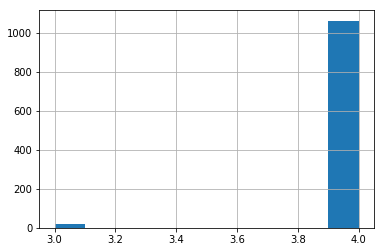

In [18]:
training_data_df[BEST_EPOCH].hist()

In [19]:
training_data_df[TOTAL_DURATION].describe()

count    1080.000000
mean     1759.025000
std       136.829952
min      1572.000000
25%      1606.000000
50%      1772.000000
75%      1788.000000
max      2145.000000
Name: Total_Duration(s), dtype: float64

In [20]:
training_data_df.groupby([EXECUTION_NUMBER]).describe()[TEST_F1_MEASURE].sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Execution_Number,,,,,,,,
2,90.0,0.876234,0.011546,0.841756,0.868889,0.881804,0.883936,0.891493
4,90.0,0.876214,0.010806,0.845387,0.866969,0.880722,0.884257,0.891332
0,90.0,0.876063,0.010843,0.839858,0.868866,0.880449,0.883999,0.888889
6,90.0,0.876035,0.010585,0.845387,0.867110,0.880569,0.883605,0.888889
11,90.0,0.876015,0.011028,0.840020,0.869438,0.880681,0.883975,0.890748
9,90.0,0.875995,0.010919,0.839186,0.866929,0.880956,0.884194,0.889964
8,90.0,0.875983,0.010708,0.837720,0.868756,0.880456,0.883815,0.888832
5,90.0,0.875974,0.011746,0.838972,0.867541,0.880629,0.884495,0.891165
10,90.0,0.875972,0.011089,0.833800,0.869269,0.880995,0.883851,0.888832


In [21]:
rp.summary_cont(training_data_df[TEST_F1_MEASURE])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Test_F1_Measure,1080.0,0.875989,0.010989,0.000334,0.875333,0.876645


In [22]:
rp.summary_cont(training_data_df.groupby(EMBEDDING))[TEST_F1_MEASURE]

,N,Mean,SD,SE,95% Conf.,Interval
Embedding,,,,,,
No,72,0.870248,0.019365,0.002282,0.865774,0.874721
fasttext,144,0.873938,0.010940,0.000912,0.872151,0.875725
fasttext-lc,144,0.872771,0.011569,0.000964,0.870881,0.874660
glove,72,0.879953,0.009728,0.001146,0.877706,0.882200
glove-lc,72,0.877511,0.010446,0.001231,0.875098,0.879924
wang2vec,144,0.876908,0.009353,0.000779,0.875380,0.878435
wang2vec-lc,144,0.877926,0.007365,0.000614,0.876723,0.879129
word2vec,144,0.877969,0.009595,0.000800,0.876402,0.879536
word2vec-lc,144,0.876553,0.009342,0.000779,0.875027,0.878078


In [23]:
# Calculating effect size
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']
    
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
    
    cols = ['sum_sq', 'mean_sq', 'df', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

def print_anova(parameter):
    # Fits the model with the interaction term
    # This will also automatically include the main effects for each factor
    model = ols('Test_F1_Measure ~ C({0})'.format(parameter), training_data_df).fit()
    # Seeing if the overall model is significant
    print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .20f}")
    print(model.summary())
    res = sm.stats.anova_lm(model, typ= 2)
    print(res)
    print(anova_table(res))
    mc = statsmodels.stats.multicomp.MultiComparison(training_data_df[TEST_F1_MEASURE], training_data_df[parameter])
    mc_results = mc.tukeyhsd()
    print(mc_results)

In [24]:
print_anova(EMBEDDING)

Overall model F( 8, 1071) =  7.648, p =  0.00000000054283611169
                            OLS Regression Results                            
Dep. Variable:        Test_F1_Measure   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     7.648
Date:                Fri, 19 Jul 2019   Prob (F-statistic):           5.43e-10
Time:                        11:57:40   Log-Likelihood:                 3369.8
No. Observations:                1080   AIC:                            -6722.
Df Residuals:                    1071   BIC:                            -6677.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------